In [1]:
#imports
import pandas as pd 
import numpy as np

In [2]:
#reading csv into data frame
df = pd.read_csv('player_records.csv')
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,tr,Male,tr,survived
1,3,23,tr,heavy debt,survived
2,5,35,tr,debt,survived
3,6,tr,tr,debt,survived
4,7,tr,Female,heavy debt,survived


In [3]:
#data pre-processing

#replacing all tr to NaN 
df.replace('tr', np.nan, inplace=True)
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,NaN,Male,NaN,survived
1,3,23,NaN,heavy debt,survived
2,5,35,NaN,debt,survived
3,6,NaN,NaN,debt,survived
4,7,NaN,Female,heavy debt,survived


In [4]:
#Age column

#convert age to float 
df['Age'] = df['Age'].astype(float)

#getting youngest and oldest age
youngest = df['Age'].min()
oldest = df['Age'].max()

#replacing NaN values with a randomly generated number
#between youngest and oldeset
df['Age'] = df['Age'].apply(lambda x: np.random.randint(youngest, oldest + 1) if np.isnan(x) else x)
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,36.0,Male,NaN,survived
1,3,23.0,NaN,heavy debt,survived
2,5,35.0,NaN,debt,survived
3,6,22.0,NaN,debt,survived
4,7,26.0,Female,heavy debt,survived


In [5]:
#Sex column

#replacing Male and Female with 0 and 1 
df['Sex'].replace(['Male', 'Female'], [0,1], inplace=True)

#forward filling
df['Sex'].fillna(method='ffill', inplace=True)

df['Sex'] = df['Sex'].astype(float)

df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,36.0,0.0,NaN,survived
1,3,23.0,0.0,heavy debt,survived
2,5,35.0,0.0,debt,survived
3,6,22.0,0.0,debt,survived
4,7,26.0,1.0,heavy debt,survived


In [6]:
#Debt column

#replacing NaN in debt
debtArray = ['debt', 'heavy debt']
df['Debt'].fillna(debtArray[np.random.randint(0,2)], inplace=True)

# Define a function to replace 'debt' and 'heavy debt' with random values
def replace_debt(row):
    if row == 'debt':
        return np.random.randint(100000000, 700000001)
    else:
        return np.random.randint(700000001, 1500000000)


# Apply the function to the 'Debt' column
df['Debt'] = df['Debt'].apply(replace_debt)

df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,36.0,0.0,458501551,survived
1,3,23.0,0.0,1353108469,survived
2,5,35.0,0.0,559139532,survived
3,6,22.0,0.0,456372477,survived
4,7,26.0,1.0,1382637652,survived


In [7]:
# Ennumerating survival column

df['Survival'].replace(['survived', 'died'], [0,1], inplace=True)
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,36.0,0.0,458501551,0
1,3,23.0,0.0,1353108469,0
2,5,35.0,0.0,559139532,0
3,6,22.0,0.0,456372477,0
4,7,26.0,1.0,1382637652,0


In [8]:
#Splitting training and testing sets 
from sklearn.model_selection import train_test_split 

#get the output 
df_output = df['Survival']

#get the inputs 
df_inputs = df.drop(columns=['Survival', 'Player Number'])

df_inputs.head()

#prepare the training and testing datasets by a ratio of 70:30
x_train, x_test, y_train, y_test = train_test_split(df_inputs, df_output, test_size=0.3, random_state = 100) 

In [9]:
#Model training using decision trees 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3, random_state=1) 
dtree.fit(x_train, y_train)

from sklearn import metrics
y_predict = dtree.predict(x_test)
print('Testing accuracy \t', metrics.accuracy_score(y_test, y_predict))


Testing accuracy 	 0.8560606060606061


In [10]:
import matplotlib.pyplot as plt
#Plotting a confusion matrix 
def cf_matrix(mat, t_name, model_name): 
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    
    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range(0,len(t_name)):
        for j in range(0,len(t_name)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k")
    
    plt.ylabel('actual label')
    plt.xlabel('predicted label')
    plt.title("Confusion Matrix for " + model_name )

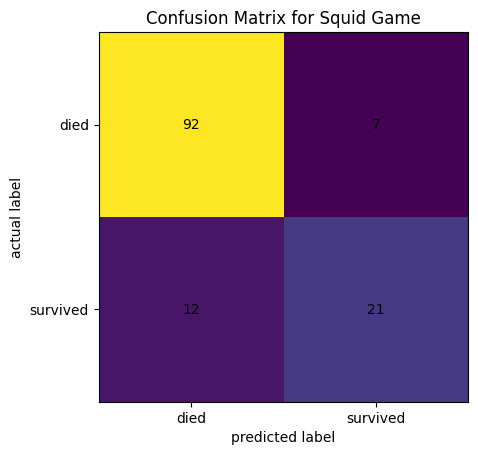

In [11]:
#confusion matrix to show results
cm = metrics.confusion_matrix(y_test, y_predict)
cf_matrix(cm,['died', 'survived'], 'Squid Game')

[Text(0.5, 0.875, 'Debt <= 656475808.0\ngini = 0.304\nsamples = 305\nvalue = [248, 57]\nclass = Died'),
 Text(0.25, 0.625, 'Age <= 23.5\ngini = 0.465\nsamples = 106\nvalue = [67, 39]\nclass = Died'),
 Text(0.125, 0.375, 'Age <= 22.5\ngini = 0.113\nsamples = 50\nvalue = [47, 3]\nclass = Died'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Died'),
 Text(0.1875, 0.125, 'gini = 0.08\nsamples = 48\nvalue = [46, 2]\nclass = Died'),
 Text(0.375, 0.375, 'Age <= 34.5\ngini = 0.459\nsamples = 56\nvalue = [20, 36]\nclass = Survived'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = Survived'),
 Text(0.4375, 0.125, 'gini = 0.498\nsamples = 43\nvalue = [20, 23]\nclass = Survived'),
 Text(0.75, 0.625, 'Age <= 62.5\ngini = 0.165\nsamples = 199\nvalue = [181, 18]\nclass = Died'),
 Text(0.625, 0.375, 'Debt <= 1090688576.0\ngini = 0.128\nsamples = 174\nvalue = [162, 12]\nclass = Died'),
 Text(0.5625, 0.125, 'gini = 0.213\nsamples = 91\nvalue = [80, 11]\

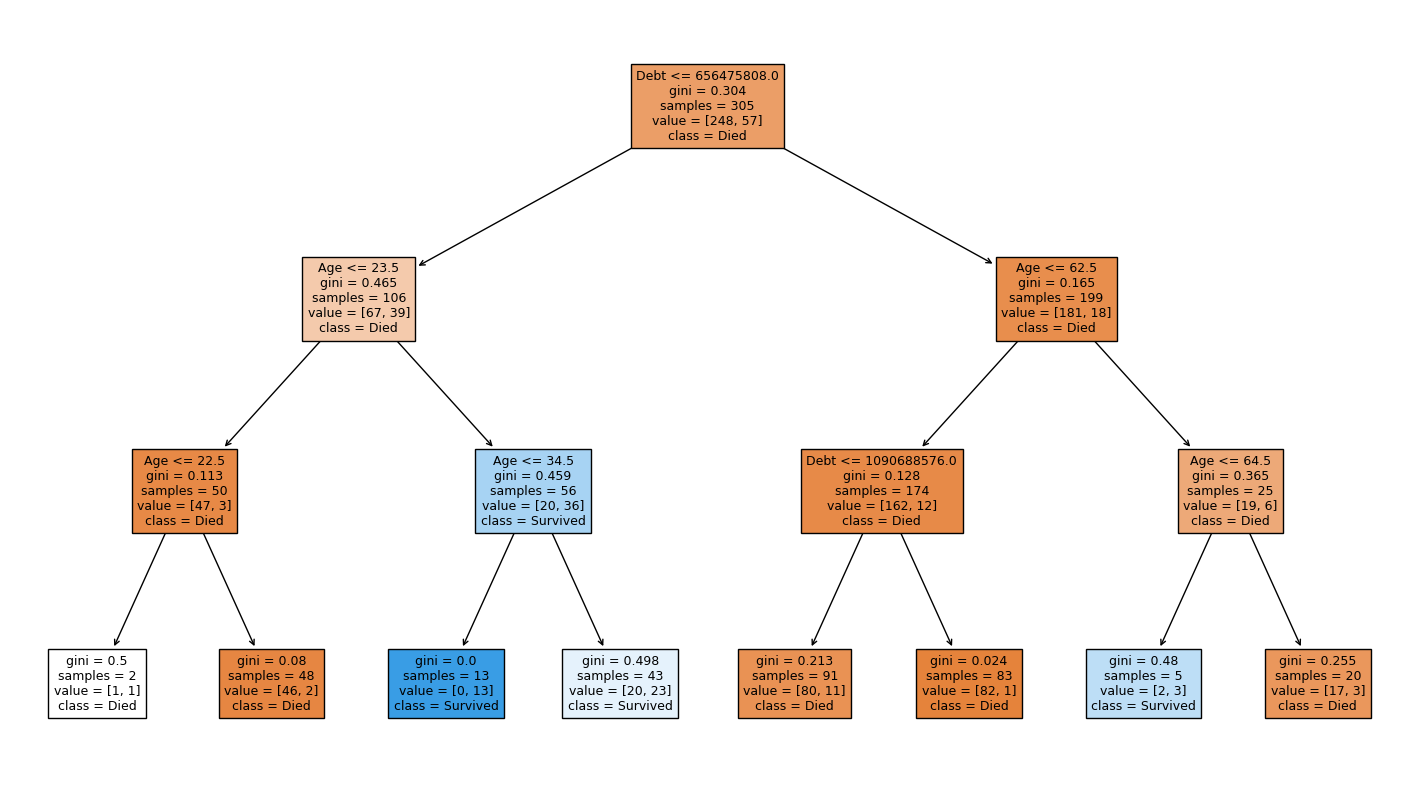

In [12]:
#Visulating the decision tree

from sklearn.tree import plot_tree

features = list(x_train.columns)
output = ['Died', 'Survived']

plt.figure(figsize=(18,10))
plot_tree(dtree, feature_names= features, class_names = output, filled=True, fontsize = 9)

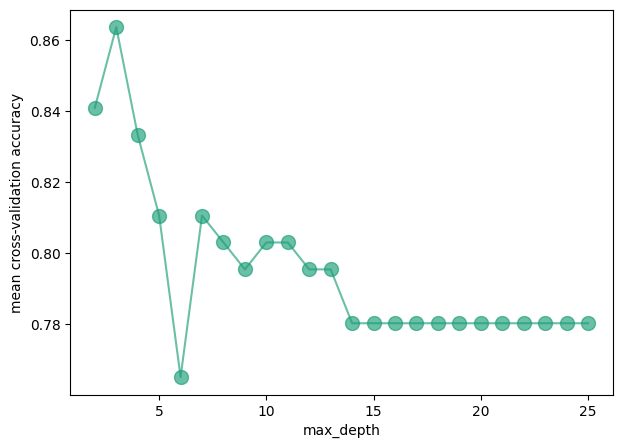

In [13]:
#finding the best depth 
from sklearn.model_selection import cross_val_score

cv_scores = list()
depth_values = range(2,26)

for d in depth_values:
    t_model_k = DecisionTreeClassifier(max_depth = d,random_state=1)
    score = cross_val_score(t_model_k, x_test, y_test, cv=3, scoring='accuracy')
    # note: the whole datasets are passed to cross_val_score, not the previously partitioned training / testing data

    mean_score = score.mean()
    cv_scores.append(mean_score)

plt.figure(figsize=(7,5))
plt.plot(depth_values, cv_scores, '-o',markersize=10,alpha=0.65,color='#1b9e77') # using matplotlib.pyplot
plt.xlabel('max_depth')
plt.ylabel('mean cross-validation accuracy')
plt.show()

#the best depth is 3!

In [14]:
#Predicting if I would die in squid game 